<a href="https://colab.research.google.com/github/Arush0113/ArushTensorflowRepo/blob/main/Training_my_first_CNN_model(fashion_mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [24]:
# Build the Sequential feedforward neural network model
model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(16, activation='relu', name = 'layer1'),
                    Dense(16, activation= 'relu'),
                    Dense(10),
                    Softmax(),
])


In [25]:
# Print the model summary
model.weights
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax_2 (Softmax)          (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [68]:
# Build the Sequential convolutional neural network model
model1 = Sequential([
                     Conv2D(16, (3,3), strides=(1,1), padding= 'valid', input_shape = (28, 28, 1)),
                     MaxPooling2D((3,3)),
                     Flatten(),
                     Dense(10, activation='softmax')
])


In [69]:
# Print the model summary



***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [70]:
# Define the model optimizer, loss function and metrics

# model.compile(
#     optimizer = 'adam',
#     loss = 'sparse_categorical_loss',
#     metrics = ['accuracy']
# )

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
# print(acc)
# print(mae)

model1.compile(
    optimizer = opt,
    loss = 'sparse_categorical_crossentropy',
    metrics = [acc, mae],  #IT DOESN'T SHOW ANY METRICS WHEN I TRY TO PRINT IT.
    # metrics = ['accuracy', 'mae']
    # metrics = 'accuracy'
)

In [72]:
# Print the resulting model attributes
print(model1.optimizer)
print(model1.loss)

###########
print(model1.metrics)  # I AM FACING A PROBLEM HERE BECAUSE I'M UNABLE TO PRINT THE METRICS IN MY MODEL.
###########

print(model1.optimizer.lr)


sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [73]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [74]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [75]:
# Print the shape of the training data
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [76]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

train_labels[0]

9

In [77]:
# Rescale the image values so that they lie in between 0 and 1.
train_images, test_images = train_images/255., test_images/255.


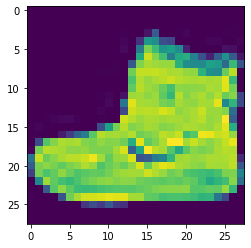

label: Ankle boot


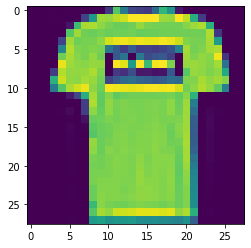

label: T-shirt/top


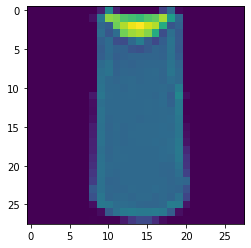

label: T-shirt/top


In [78]:
# Display one of the images
for i in range(3):
  img = train_images[i, :, :]
  plt.imshow(img)
  plt.show()
  print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [82]:
# Fit the model

history = model1.fit(train_images[..., np.newaxis], train_labels, epochs = 8, batch_size=256, verbose=2)
history

Epoch 1/8
235/235 - 10s - loss: 0.3136 - sparse_categorical_accuracy: 0.8878 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 11s - loss: 0.3057 - sparse_categorical_accuracy: 0.8902 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 10s - loss: 0.2965 - sparse_categorical_accuracy: 0.8929 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 10s - loss: 0.2950 - sparse_categorical_accuracy: 0.8952 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 11s - loss: 0.2866 - sparse_categorical_accuracy: 0.8975 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 11s - loss: 0.2817 - sparse_categorical_accuracy: 0.8990 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 10s - loss: 0.2773 - sparse_categorical_accuracy: 0.9002 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 11s - loss: 0.2740 - sparse_categorical_accuracy: 0.9014 - mean_absolute_error: 4.4200


#### Plot training history

In [83]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head(10)



,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.313610,0.887850,4.420000
1,0.305700,0.890167,4.420000
2,0.296538,0.892867,4.420001
3,0.294969,0.895150,4.420000
4,0.286580,0.897550,4.419999
5,0.281727,0.899017,4.420000
6,0.277299,0.900233,4.419999
7,0.273965,0.901417,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

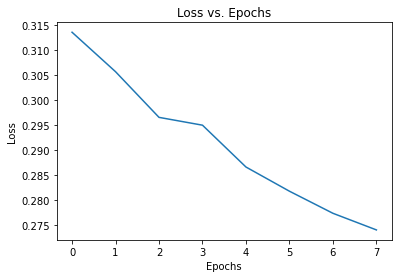

In [84]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model



#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

